<a href="https://colab.research.google.com/github/joezaarour/Repo1/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
# install mplfinance
!pip install mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Check files on disk
* Go to https://www.kaggle.com/datasets/adhoppin/financial-data?resource=download and download the data.
* Extract the data in your folder, or updload it on Google Colab.
    * You can directly upload a 'zip' file on Google Drive.
    * Then, you'll have to mount google drive, find the correct folder and unzip the file
    * You can achieve this by  adapting the following code

In [1]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')
!ls


Mounted at /content/drive
drive  sample_data


In [6]:
!unzip drive/MyDrive/Python\ for\ Finance/financial_data.zip

Archive:  drive/MyDrive/Python for Finance/financial_data.zip
  inflating: Financial Data/cryptocurrencies/ADA-USD.csv  
  inflating: Financial Data/cryptocurrencies/BCH-USD.csv  
  inflating: Financial Data/cryptocurrencies/BTC-USD.csv  
  inflating: Financial Data/cryptocurrencies/ETH-USD.csv  
  inflating: Financial Data/cryptocurrencies/LTC-USD.csv  
  inflating: Financial Data/cryptocurrencies/XRP-USD.csv  
  inflating: Financial Data/currencies/AUD.csv  
  inflating: Financial Data/currencies/CAD.csv  
  inflating: Financial Data/currencies/EUR.csv  
  inflating: Financial Data/currencies/GBP.csv  
  inflating: Financial Data/currencies/INR.csv  
  inflating: Financial Data/currencies/JPY.csv  
  inflating: Financial Data/stocks/AAPL.csv  
  inflating: Financial Data/stocks/ADBE.csv  
  inflating: Financial Data/stocks/AMD.csv  
  inflating: Financial Data/stocks/AMGN.csv  
  inflating: Financial Data/stocks/AMZN.csv  
  inflating: Financial Data/stocks/CMCSA.csv  
  inflating: F

In [7]:
import os
dirpath='./Financial Data/stocks'
for dirname, _, filenames in os.walk(dirpath): # for each directory in current folder (./)+path
    for filename in filenames: # for each file in a directory
        print(os.path.join(dirname, filename)) # print the directory/filename

./Financial Data/stocks/SBUX.csv
./Financial Data/stocks/MSFT.csv
./Financial Data/stocks/META.csv
./Financial Data/stocks/AMZN.csv
./Financial Data/stocks/GOOGL.csv
./Financial Data/stocks/QCOM.csv
./Financial Data/stocks/PYPL.csv
./Financial Data/stocks/GILD.csv
./Financial Data/stocks/CSCO.csv
./Financial Data/stocks/TSLA.csv
./Financial Data/stocks/PEP.csv
./Financial Data/stocks/AAPL.csv
./Financial Data/stocks/ADBE.csv
./Financial Data/stocks/GOOG.csv
./Financial Data/stocks/NVDA.csv
./Financial Data/stocks/AMGN.csv
./Financial Data/stocks/NFLX.csv
./Financial Data/stocks/INTC.csv
./Financial Data/stocks/AMD.csv
./Financial Data/stocks/CMCSA.csv


# Open a file as a pandas dataframe

Pandas is very well documented, check here for a complete User Guide :

https://pandas.pydata.org/docs/user_guide/index.html

* Choose one stock file and open it as a DataFrame using the method pd.read_csv(filepath)

In [9]:
import pandas as pd

filepath = './Financial Data/stocks/AAPL.csv'

df = pd.read_csv(filepath)

print(df.head())

         Date      Open      High       Low     Close     Volume Symbol  \
0  2002-12-31  0.250000  0.256429  0.249107  0.255893  200726400   AAPL   
1  2003-01-02  0.256429  0.266429  0.256250  0.264286  181428800   AAPL   
2  2003-01-03  0.264286  0.266607  0.260536  0.266071  147453600   AAPL   
3  2003-01-06  0.268393  0.274643  0.265714  0.266071  390532800   AAPL   
4  2003-01-07  0.264107  0.267857  0.258393  0.265179  342344800   AAPL   

   YTD Gains  
0   0.000000  
1   0.032799  
2   0.039774  
3   0.039774  
4   0.036289  


# Set up the Dataframe

* convert values in the 'Date' column using pd.to_datetime(dfcolumn)
* set the date as index using df.set_index(column, inplace = True)
* check the first few lines of the dataframe using head()
* what happens if you type 'print(df[(df.index.day==1) & (df.index.month==9)]). Why ?

In [16]:
import pandas as pd

df = pd.read_csv(filepath)

#1
df["Date"] = pd.to_datetime(df["Date"])

#2
df.set_index("Date", inplace=True)








In [14]:
#3
df.head()

,Open,High,Low,Close,Volume,Symbol,YTD Gains
Date,,,,,,,
2002-12-31,0.250000,0.256429,0.249107,0.255893,200726400,AAPL,0.000000
2003-01-02,0.256429,0.266429,0.256250,0.264286,181428800,AAPL,0.032799
2003-01-03,0.264286,0.266607,0.260536,0.266071,147453600,AAPL,0.039774
2003-01-06,0.268393,0.274643,0.265714,0.266071,390532800,AAPL,0.039774
2003-01-07,0.264107,0.267857,0.258393,0.265179,342344800,AAPL,0.036289


In [15]:
#4
print(df[(df.index.day == 1) & (df.index.month == 9)])


                  Open        High         Low       Close     Volume Symbol  \
Date                                                                           
2004-09-01    0.612500    0.642679    0.610536    0.640357  515726400   AAPL   
2005-09-01    1.678571    1.684643    1.646071    1.652143  356367200   AAPL   
2006-09-01    2.445714    2.451786    2.422143    2.442143  408494800   AAPL   
2009-09-01    5.999643    6.071429    5.890714    5.903571  469028000   AAPL   
2010-09-01    8.838214    8.980714    8.795714    8.940357  697037600   AAPL   
2011-09-01   13.779286   13.833571   13.597143   13.608214  343725200   AAPL   
2015-09-01   27.537500   27.969999   26.840000   26.930000  307383600   AAPL   
2016-09-01   26.535000   26.700001   26.405001   26.682501  106806000   AAPL   
2017-09-01   41.200001   41.235001   40.907501   41.012501   66364400   AAPL   
2020-09-01  132.759995  134.800003  130.529999  134.179993  151948100   AAPL   
2021-09-01  152.830002  154.979996  152.

# Plot the closing price
You will start using PyPlot here, the most wellknown plotting library for Python.

Have a look here for a few examples :

https://matplotlib.org/stable/tutorials/pyplot.html

* Use df.plot(y = ..., use_index = True) to visualize the closing price
* Use 'plt' and 'sns' functions to improve your figure
    * Define a size for the figure with plt.figure(figsize = (w,h)), unit is inches (typically (12,8))
    * Use df.plot(y = ..., use_index = True) to visualize the closing price
    * set a title with plt.title
    * set labels with plt.xlabel and plt.ylabel
    * set a sns style with sns.set_style(...), options are 'white', 'whitegrid', 'dark', 'darkgrid'
    * show the plot with plt.show()

<Figure size 1200x800 with 0 Axes>

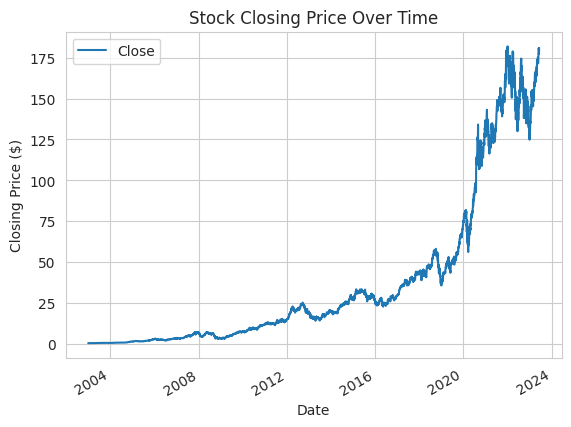

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load your data
df = pd.read_csv(filepath)

# 2️⃣ Convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# 3️⃣ Set Date as index
df.set_index("Date", inplace=True)

# 4️⃣ Choose a Seaborn style
sns.set_style("whitegrid")  # options: 'white', 'whitegrid', 'dark', 'darkgrid'

# 5️⃣ Create a figure and set its size
plt.figure(figsize=(12, 8))

# 6️⃣ Plot the closing price (replace 'Close' with your actual column name)
df.plot(y="Close", use_index=True)

# 7️⃣ Add title and labels
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")

# 8️⃣ Show the plot
plt.show()



# Daily returns
* Let's add a column to our dataset with daily returns
    * For that, you can apply the function pct_change() to the 'Close' column
    * Check the result using df.head()

In [19]:
import pandas as pd

# 1️⃣ Load your dataset
df = pd.read_csv(filepath)

# 2️⃣ Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# 3️⃣ Set 'Date' as index
df.set_index("Date", inplace=True)

# 4️⃣ Compute daily returns using pct_change()
df["Daily Return"] = df["Close"].pct_change()

# 5️⃣ Check the result
print(df.head())


                Open      High       Low     Close     Volume Symbol  \
Date                                                                   
2002-12-31  0.250000  0.256429  0.249107  0.255893  200726400   AAPL   
2003-01-02  0.256429  0.266429  0.256250  0.264286  181428800   AAPL   
2003-01-03  0.264286  0.266607  0.260536  0.266071  147453600   AAPL   
2003-01-06  0.268393  0.274643  0.265714  0.266071  390532800   AAPL   
2003-01-07  0.264107  0.267857  0.258393  0.265179  342344800   AAPL   

            YTD Gains  Daily Return  
Date                                 
2002-12-31   0.000000           NaN  
2003-01-02   0.032799      0.032799  
2003-01-03   0.039774      0.006754  
2003-01-06   0.039774      0.000000  
2003-01-07   0.036289     -0.003352  


# Plotting daily returns

You will use Seaborn for that plot. Seaborn is a high-level and quite intuitive library.

Check the following link for several plot examples :

https://seaborn.pydata.org/tutorial/introduction.html

* Plot the histogram of daily returns in order to check the distribution
    * This can be done using sns.histplot(..., bins=..., kde=[True/False]). You can vary the bins number and try with or without kde.
    * Don't forget that the first value is a NaN (not a number), you can discard it using df['Your_column'].dropna()
    * You can remove axis if it looks more beautiful to you using sns.despine(left = True). This will remove the top, right (default) and left axis.

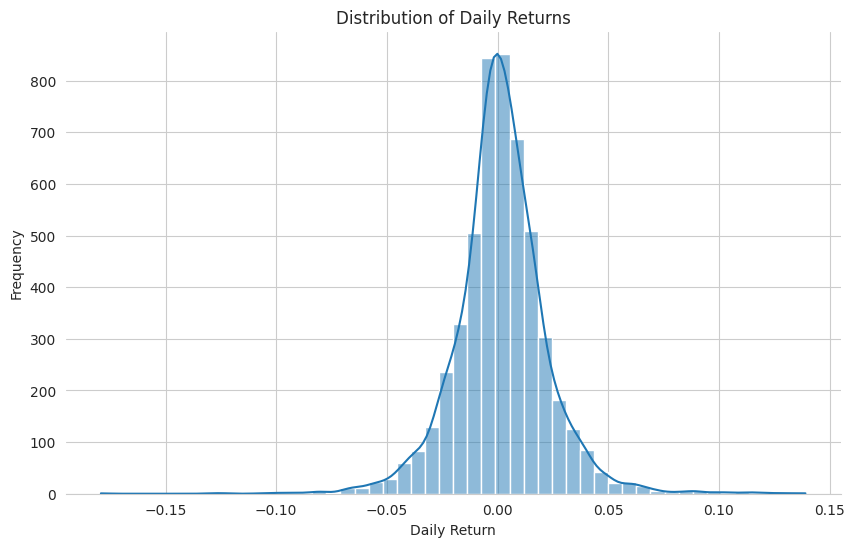

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Load and prepare your data
df = pd.read_csv(filepath)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# 2️⃣ Calculate daily returns
df["Daily Return"] = df["Close"].pct_change()

# 3️⃣ Set a Seaborn style
sns.set_style("whitegrid")  # options: 'white', 'dark', 'whitegrid', 'darkgrid'

# 4️⃣ Create a figure
plt.figure(figsize=(10, 6))

# 5️⃣ Plot the histogram of daily returns (remove NaN values)
sns.histplot(df["Daily Return"].dropna(), bins=50, kde=True)

# 6️⃣ Add title and labels
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

# 7️⃣ Optional: clean up the look by removing some axes
sns.despine(left=True)

# 8️⃣ Show the plot
plt.show()


# Candlestick charts
Matplotlib also contains a library specialized for Finance, called mplfinance

Have a look here for a list of tutorials :

https://github.com/matplotlib/mplfinance#tutorials

* A bit of preprocessing is needed on the dataframe
    * First, filter the dataframe to only keep data from 2022 or after. In other words, you want all the rows for which df.index.year>2021. Store that in a new dataframe.
    * Then, compute a monthly mean by applying the functions resample(...) and mean() to your new dataframe. Again, store that in a new dataframe.
* Visualize the candlestick plot with mplfinance
    * Import the correct library (mplfinance, usually loaded as mpf)
    * Plot using mpf.plot(..., type = 'candle', style = '...', volume = [True|False])
    * Try different styles, different options and see the impact on the figure

In [21]:
pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


/tmp/ipython-input-3829601130.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df_2022.resample("M").mean(numeric_only=True)
/tmp/ipython-input-3829601130.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ohlc_monthly = df_2022.resample("M").agg({


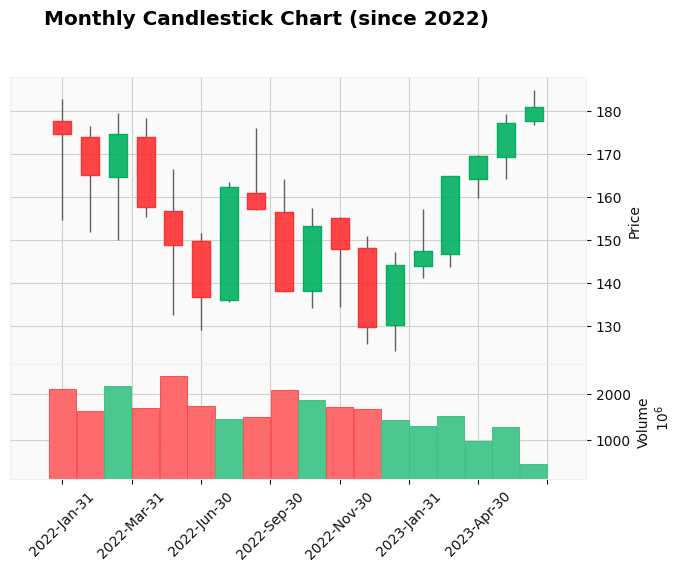

In [22]:
# 📊 Candlestick Chart Example with mplfinance

import pandas as pd
import mplfinance as mpf

# 1️⃣ Load the CSV file (make sure it has columns: Date, Open, High, Low, Close, Volume)
df = pd.read_csv(filepath)

# 2️⃣ Convert 'Date' column to datetime and set it as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# 3️⃣ Filter data to keep only from 2022 onwards
df_2022 = df[df.index.year > 2021].copy()

# 4️⃣ Compute monthly averages (optional summary)
monthly_mean = df_2022.resample("M").mean(numeric_only=True)

# 5️⃣ Compute monthly OHLC data for candlestick chart
ohlc_monthly = df_2022.resample("M").agg({
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum",
})

# 6️⃣ Plot candlestick chart (monthly)
mpf.plot(
    ohlc_monthly,
    type="candle",         # candlestick chart
    style="yahoo",         # try also 'charles', 'blueskies', 'nightclouds'
    volume=True,           # show volume below the chart
    title="Monthly Candlestick Chart (since 2022)",
    ylabel="Price",
    ylabel_lower="Volume",
    mav=(20, 50)           # moving averages (20 and 50 periods)
)

# ✅ You can change "M" above to "W" for weekly or "D" for daily candles
